In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pylab as pl

import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 


In [2]:
cell_df = pd.read_csv("clevBinary.csv")
cell_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [3]:
feature_df = cell_df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
X = np.asarray(feature_df)
X[0:5]

array([[ 63. ,   1. ,   1. , 145. , 233. ,   1. ,   2. , 150. ,   0. ,
          2.3,   3. ,   0. ,   6. ],
       [ 67. ,   1. ,   4. , 160. , 286. ,   0. ,   2. , 108. ,   1. ,
          1.5,   2. ,   3. ,   3. ],
       [ 67. ,   1. ,   4. , 120. , 229. ,   0. ,   2. , 129. ,   1. ,
          2.6,   2. ,   2. ,   7. ],
       [ 37. ,   1. ,   3. , 130. , 250. ,   0. ,   0. , 187. ,   0. ,
          3.5,   3. ,   0. ,   3. ],
       [ 41. ,   0. ,   2. , 130. , 204. ,   0. ,   2. , 172. ,   0. ,
          1.4,   1. ,   0. ,   3. ]])

In [4]:
cell_df['num'] = cell_df['num'].astype('int')
y = np.asarray(cell_df['num'])
y [0:5]

array([0, 1, 1, 0, 0])

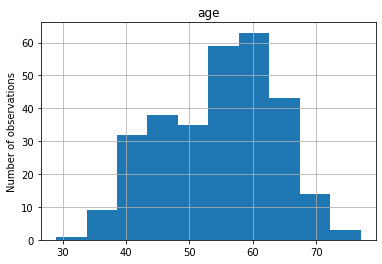

In [5]:
# let's plot a histogram to understand the
# variable's value range.

cell_df['age'].hist(bins=10)
plt.title('age')
plt.ylabel("Number of observations")
plt.show()

In [6]:
# bin boundaries - we will use with pandas cut()
intervals = [18, 36, 55, np.Inf]

# bin labels - we will use with pandas cut()
labels = ["18-35", "36-55", ">55"]

In [7]:
# discretize variable: use labels for the intervals

cell_df["age_range"] = pd.cut(
    cell_df["age"],
    bins=intervals,
    labels=labels,
    include_lowest=True,
)

# discretize variable: use interval limits

cell_df["age_limits"] = pd.cut(
    cell_df["age"], bins=intervals, labels=None, include_lowest=True
)


# plot the original and 2 versions of the discretized variable

cell_df[["age", "age_range", "age_limits"]].head()

,age,age_range,age_limits
0,63,>55,"(55.0, inf]"
1,67,>55,"(55.0, inf]"
2,67,>55,"(55.0, inf]"
3,37,36-55,"(36.0, 55.0]"
4,41,36-55,"(36.0, 55.0]"


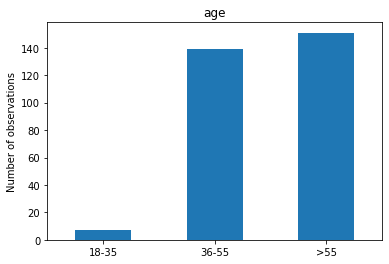

In [8]:
# let's check the number of observations per bin

cell_df["age_range"].value_counts().sort_index().plot.bar()
plt.xticks(rotation=0)
plt.ylabel("Number of observations")
plt.title("age")
plt.show()

In [9]:
cell_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,age_range,age_limits
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,>55,"(55.0, inf]"
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,>55,"(55.0, inf]"
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,>55,"(55.0, inf]"
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,36-55,"(36.0, 55.0]"
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,36-55,"(36.0, 55.0]"


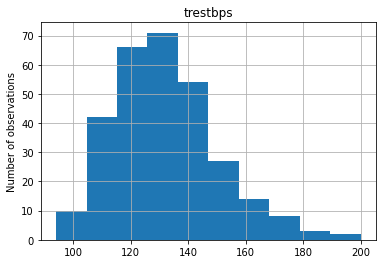

In [10]:
# let's plot a histogram to understand the
# variable's value range.

cell_df['trestbps'].hist(bins=10)
plt.title('trestbps')
plt.ylabel("Number of observations")
plt.show()

In [11]:
# bin boundaries - we will use with pandas cut()
intervals = [90, 100, 120, 139, 159, np.Inf]

# bin labels - we will use with pandas cut()
labels = ["90-100", "100-120", "120-139", "140-159","≥160"]

In [12]:
# discretize variable: use labels for the intervals

cell_df["trestbps_range"] = pd.cut(
    cell_df["trestbps"],
    bins=intervals,
    labels=labels,
    include_lowest=True,
)

# plot the original and 2 versions of the discretized variable

cell_df[["trestbps", "trestbps_range"]].head()

,trestbps,trestbps_range
0,145,140-159
1,160,≥160
2,120,100-120
3,130,120-139
4,130,120-139


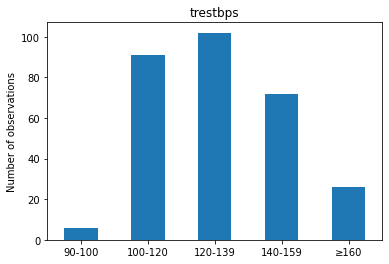

In [13]:
# let's check the number of observations per bin

cell_df["trestbps_range"].value_counts().sort_index().plot.bar()
plt.xticks(rotation=0)
plt.ylabel("Number of observations")
plt.title("trestbps")
plt.show()

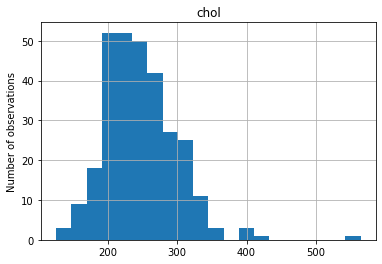

In [14]:
# let's plot a histogram to understand the
# variable's value range.

cell_df['chol'].hist(bins=20)
plt.title('chol')
plt.ylabel("Number of observations")
plt.show()

In [15]:
# bin boundaries - we will use with pandas cut()
intervals = [0, 199, 239, np.Inf]

# bin labels - we will use with pandas cut()
labels = ["0-199", "200-239","≥240"]

In [16]:
# discretize variable: use labels for the intervals

cell_df["chol_range"] = pd.cut(
    cell_df["chol"],
    bins=intervals,
    labels=labels,
    include_lowest=True,
)

# plot the original and 2 versions of the discretized variable

cell_df[["chol", "chol_range"]].head()

,chol,chol_range
0,233,200-239
1,286,≥240
2,229,200-239
3,250,≥240
4,204,200-239


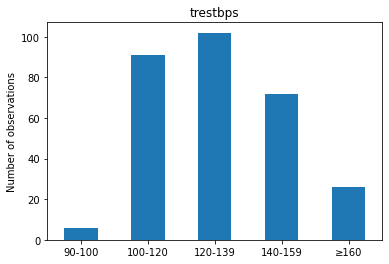

In [17]:
# let's check the number of observations per bin

cell_df["trestbps_range"].value_counts().sort_index().plot.bar()
plt.xticks(rotation=0)
plt.ylabel("Number of observations")
plt.title("trestbps")
plt.show()

In [18]:
cell_df["ST/HR"]=cell_df["oldpeak"]/cell_df["thalach"]

In [19]:
# bin boundaries - we will use with pandas cut()
intervals = [0, 0.01, 0.02, np.Inf]

# bin labels - we will use with pandas cut()
labels = ["low", "medium","high"]

In [20]:
# discretize variable: use labels for the intervals

cell_df["ST/HR_range"] = pd.cut(
    cell_df["ST/HR"],
    bins=intervals,
    labels=labels,
    include_lowest=True,
)

# plot the original and 2 versions of the discretized variable

cell_df[["ST/HR", "ST/HR_range"]].head()

,ST/HR,ST/HR_range
0,0.015333,medium
1,0.013889,medium
2,0.020155,high
3,0.018717,medium
4,0.008140,low


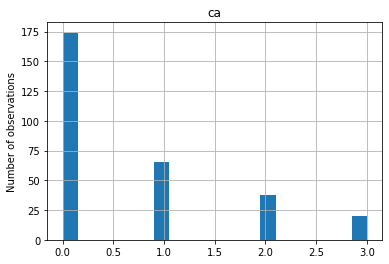

In [21]:
# let's plot a histogram to understand the
# variable's value range.

cell_df['ca'].hist(bins=20)
plt.title('ca')
plt.ylabel("Number of observations")
plt.show()

In [22]:
# let's determine the target mean value per
# category of ST/HR_range and then sort them in ascending order

cell_df['num'].groupby(cell_df['ST/HR_range']).mean().sort_values()

ST/HR_range
low       0.323529
medium    0.683333
high      0.909091
Name: num, dtype: float64

In [23]:
# let's we generate an ordered list with the labels of ST/HR_range

ordered_labels = cell_df['num'].groupby(cell_df['ST/HR_range']).mean().sort_values().index

ordered_labels

CategoricalIndex(['low', 'medium', 'high'], categories=['low', 'medium', 'high'], ordered=True, dtype='category', name='ST/HR_range')

In [24]:
# let's create a dictionary with the mappings of categories to numbers

ordinal_mapping = {k: i for i, k in enumerate(ordered_labels, 1)}

ordinal_mapping

{'low': 1, 'medium': 2, 'high': 3}

In [25]:
# replace the labels with the ordered numbers

cell_df['ST/HR_range_enc'] = cell_df['ST/HR_range'].map(ordinal_mapping)


In [26]:
# let's inspect the original variable

cell_df['ST/HR_range'].head()

0    medium
1    medium
2      high
3    medium
4       low
Name: ST/HR_range, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

In [27]:
# let's inspect the encoded variable

cell_df['ST/HR_range_enc'].head()

0    2
1    2
2    3
3    2
4    1
Name: ST/HR_range_enc, dtype: category
Categories (3, int64): [1 < 2 < 3]

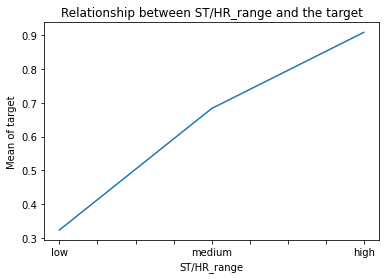

In [28]:
# let's plot the relationship between the target
# and the original variable

cell_df['num'].groupby(cell_df['ST/HR_range']).mean().plot()
plt.title("Relationship between ST/HR_range and the target")
plt.ylabel("Mean of target")
plt.show()

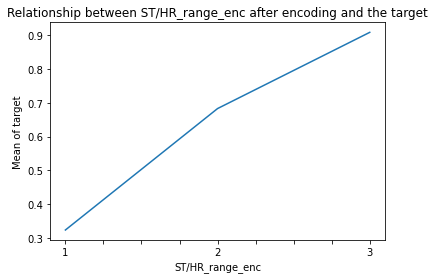

In [29]:
# let's explore the monotonic relationship between
# the target and the encoded variable

cell_df['num'].groupby(cell_df['ST/HR_range_enc']).mean().plot()
plt.title("Relationship between ST/HR_range_enc after encoding and the target")
plt.ylabel("Mean of target")
plt.show()

In [30]:
cell_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,ca,thal,num,age_range,age_limits,trestbps_range,chol_range,ST/HR,ST/HR_range,ST/HR_range_enc
0,63,1,1,145,233,1,2,150,0,2.3,...,0,6,0,>55,"(55.0, inf]",140-159,200-239,0.015333,medium,2
1,67,1,4,160,286,0,2,108,1,1.5,...,3,3,1,>55,"(55.0, inf]",≥160,≥240,0.013889,medium,2
2,67,1,4,120,229,0,2,129,1,2.6,...,2,7,1,>55,"(55.0, inf]",100-120,200-239,0.020155,high,3
3,37,1,3,130,250,0,0,187,0,3.5,...,0,3,0,36-55,"(36.0, 55.0]",120-139,≥240,0.018717,medium,2
4,41,0,2,130,204,0,2,172,0,1.4,...,0,3,0,36-55,"(36.0, 55.0]",120-139,200-239,0.008140,low,1


In [31]:
# let's we generate an ordered list with the labels of age_range

ordered_labels = cell_df['num'].groupby(cell_df['age_range']).mean().sort_values().index

ordered_labels

CategoricalIndex(['18-35', '36-55', '>55'], categories=['18-35', '36-55', '>55'], ordered=True, dtype='category', name='age_range')

In [32]:
# let's create a dictionary with the mappings of categories to numbers

ordinal_mapping = {k: i for i, k in enumerate(ordered_labels, 1)}

ordinal_mapping

{'18-35': 1, '36-55': 2, '>55': 3}

In [33]:
# replace the labels with the ordered numbers

cell_df['age_range_enc'] = cell_df['age_range'].map(ordinal_mapping)


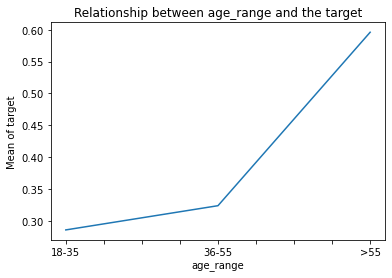

In [34]:
# let's plot the relationship between the target
# and the original variable

cell_df['num'].groupby(cell_df['age_range']).mean().plot()
plt.title("Relationship between age_range and the target")
plt.ylabel("Mean of target")
plt.show()

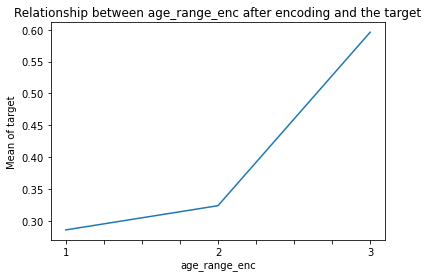

In [35]:
# let's explore the monotonic relationship between
# the target and the encoded variable

cell_df['num'].groupby(cell_df['age_range_enc']).mean().plot()
plt.title("Relationship between age_range_enc after encoding and the target")
plt.ylabel("Mean of target")
plt.show()

In [36]:
# let's we generate an ordered list with the labels of trestbps_range

ordered_labels = cell_df['num'].groupby(cell_df['trestbps_range']).mean().sort_values().index

ordered_labels

CategoricalIndex(['90-100', '100-120', '120-139', '140-159', '≥160'], categories=['90-100', '100-120', '120-139', '140-159', '≥160'], ordered=True, dtype='category', name='trestbps_range')

In [37]:
# let's create a dictionary with the mappings of categories to numbers

ordinal_mapping = {k: i for i, k in enumerate(ordered_labels, 1)}

ordinal_mapping

{'90-100': 1, '100-120': 2, '120-139': 3, '140-159': 4, '≥160': 5}

In [38]:
# replace the labels with the ordered numbers

cell_df['trestbps_range_enc'] = cell_df['trestbps_range'].map(ordinal_mapping)

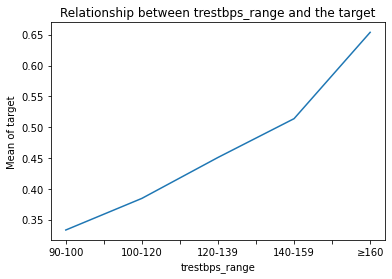

In [39]:
# let's plot the relationship between the target
# and the original variable

cell_df['num'].groupby(cell_df['trestbps_range']).mean().plot()
plt.title("Relationship between trestbps_range and the target")
plt.ylabel("Mean of target")
plt.show()

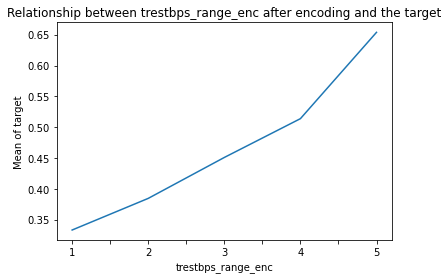

In [40]:
# let's explore the monotonic relationship between
# the target and the encoded variable

cell_df['num'].groupby(cell_df['trestbps_range_enc']).mean().plot()
plt.title("Relationship between trestbps_range_enc after encoding and the target")
plt.ylabel("Mean of target")
plt.show()

In [41]:
# let's we generate an ordered list with the labels of chol_range

ordered_labels = cell_df['num'].groupby(cell_df['chol_range']).mean().sort_values().index 

ordered_labels

CategoricalIndex(['200-239', '0-199', '≥240'], categories=['0-199', '200-239', '≥240'], ordered=True, dtype='category', name='chol_range')

In [42]:
# let's create a dictionary with the mappings of categories to numbers

ordinal_mapping = {'200-239': 2, '0-199': 1, '≥240': 3}

ordinal_mapping

{'200-239': 2, '0-199': 1, '≥240': 3}

In [43]:
# replace the labels with the ordered numbers


cell_df['chol_range_enc'] = cell_df['chol_range'].map(ordinal_mapping)

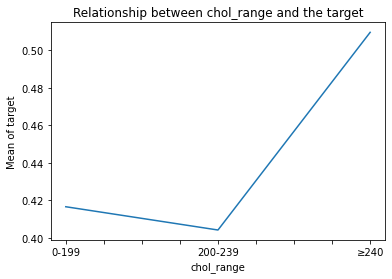

In [44]:
# let's plot the relationship between the target
# and the original variable

cell_df['num'].groupby(cell_df['chol_range']).mean().plot()
plt.title("Relationship between chol_range and the target")
plt.ylabel("Mean of target")
plt.show()

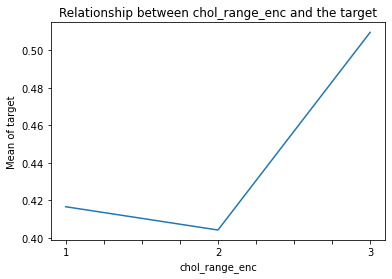

In [45]:
# let's explore the monotonic relationship between
# the target and the encoded variable

cell_df['num'].groupby(cell_df['chol_range_enc']).mean().plot()
plt.title("Relationship between chol_range_enc and the target")
plt.ylabel("Mean of target")
plt.show()

In [46]:
cell_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,age_range,age_limits,trestbps_range,chol_range,ST/HR,ST/HR_range,ST/HR_range_enc,age_range_enc,trestbps_range_enc,chol_range_enc
0,63,1,1,145,233,1,2,150,0,2.3,...,>55,"(55.0, inf]",140-159,200-239,0.015333,medium,2,3,4,2
1,67,1,4,160,286,0,2,108,1,1.5,...,>55,"(55.0, inf]",≥160,≥240,0.013889,medium,2,3,5,3
2,67,1,4,120,229,0,2,129,1,2.6,...,>55,"(55.0, inf]",100-120,200-239,0.020155,high,3,3,2,2
3,37,1,3,130,250,0,0,187,0,3.5,...,36-55,"(36.0, 55.0]",120-139,≥240,0.018717,medium,2,2,3,3
4,41,0,2,130,204,0,2,172,0,1.4,...,36-55,"(36.0, 55.0]",120-139,200-239,0.008140,low,1,2,3,2


In [47]:
feature_df = cell_df[['age_range_enc','sex','cp','trestbps_range_enc','chol_range_enc','fbs','restecg','ST/HR_range_enc','exang','slope','ca','thal']]
X = np.asarray(feature_df)
X[0:5]

array([[3, 1, 1, 4, 2, 1, 2, 2, 0, 3, 0, 6],
       [3, 1, 4, 5, 3, 0, 2, 2, 1, 2, 3, 3],
       [3, 1, 4, 2, 2, 0, 2, 3, 1, 2, 2, 7],
       [2, 1, 3, 3, 3, 0, 0, 2, 0, 3, 0, 3],
       [2, 0, 2, 3, 2, 0, 2, 1, 0, 1, 0, 3]], dtype=int64)

In [48]:
cell_df['num'] = cell_df['num'].astype('int')
y = np.asarray(cell_df['num'])
y [0:5]

array([0, 1, 1, 0, 0])

# Now Let's Go

In [49]:
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import svm
# prepare the cross-validation procedure
cv = KFold(n_splits=20, random_state=1, shuffle=True)
# create model
clf = svm.SVC(kernel='linear',probability=True)
# evaluate model
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print(scores)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

[0.93333333 0.93333333 1.         0.66666667 0.8        0.8
 0.6        0.93333333 0.93333333 0.8        0.86666667 0.66666667
 0.93333333 0.8        0.93333333 0.66666667 1.         0.92857143
 0.85714286 0.85714286]
Accuracy: 0.845 (0.115)


In [50]:
import matplotlib.pyplot as plt


from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report, confusion_matrix
import itertools

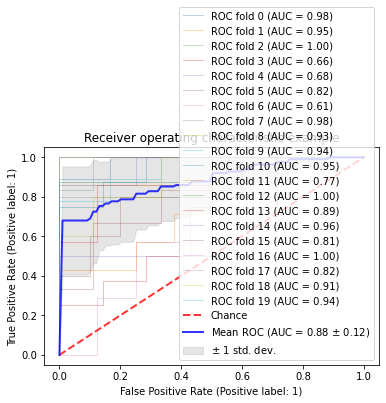

In [51]:

# Run classifier with cross-validation and plot ROC curves
cv = KFold(n_splits=20, random_state=1, shuffle=True)
classifier = clf
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

In [52]:
import matplotlib.pyplot as plot
import numpy as num
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
#heart = X
data = X
target = y
classnames = ['No(0)','Yes(1)']
classnames
labels, counts = num.unique(target, return_counts=True)
print(data)
def evaluate_model(data_x, data_y):
    k_fold = KFold(n_splits=20, random_state=1, shuffle=True)

    predicted_targets = num.array([])
    actual_targets = num.array([])

    for train_ix, test_ix in k_fold.split(data_x):
        train_x, train_y, test_x, test_y = data_x[train_ix], data_y[train_ix], data_x[test_ix], data_y[test_ix]

        classifiers = clf.fit(train_x, train_y)
        predicted_labels = classifiers.predict(test_x)

        predicted_targets = num.append(predicted_targets, predicted_labels)
        actual_targets = num.append(actual_targets, test_y)

    return predicted_targets, actual_targets
  

[[3 1 1 ... 3 0 6]
 [3 1 4 ... 2 3 3]
 [3 1 4 ... 2 2 7]
 ...
 [3 1 4 ... 2 2 7]
 [3 1 4 ... 2 1 7]
 [3 0 2 ... 2 1 3]]


              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86       160
         1.0       0.85      0.80      0.83       137

    accuracy                           0.85       297
   macro avg       0.85      0.84      0.84       297
weighted avg       0.85      0.85      0.84       297

Confusion matrix, without normalization


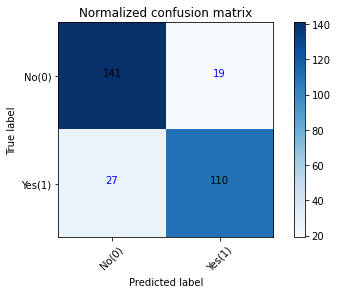

In [53]:
def plot_confusion_matrix(predicted_labels_list, y_test_list):
    cnf_matrix = confusion_matrix(y_test_list, predicted_labels_list, labels=[0,1])
    num.set_printoptions(precision=2)
    print (classification_report(actual_target, predicted_target))

   
    plot.figure()
    generate_confusion_matrix(cnf_matrix, classes=['No(0)','Yes(1)'], normalize=False, title='Normalized confusion matrix')
    plot.show()
def generate_confusion_matrix(cnf_matrix, classes, normalize=False, title='Confusion matrix'):
    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, num.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plot.imshow(cnf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plot.title(title)
    plot.colorbar()

    tick_marks = np.arange(len(classes))
    plot.xticks(tick_marks, classes, rotation=45)
    plot.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cnf_matrix.max() / 2.

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plot.text(j, i, format(cnf_matrix[i, j], fmt), horizontalalignment="center",
                 color="black" if cnf_matrix[i, j] > thresh else "blue")

    plot.tight_layout()
    plot.ylabel('True label')
    plot.xlabel('Predicted label')

    return cnf_matrix
predicted_target, actual_target = evaluate_model(data, target)
plot_confusion_matrix(predicted_target, actual_target)